In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#import geopandas as gpd

In [3]:
#coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'AIO'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,AIO/Z/0.05-0.2,AIO/Z/0.2-0.35,AIO/Z/0.35-0.5,AIO/Z/0.5-0.65,AIO/Z/0.65-0.8,AIO/Z/0.8-0.95,AIO/Z/0.95-1.1,AIO/Z/1.1-1.25,AIO/Z/1.25-1.4,AIO/Z/1.4-1.55,...,AIO/E/1.7-1.85,AIO/E/1.85-2.0,"(37.895835876464844, 15.333335876464844)","(37.9375, 15.375)","(37.895835876464844, 15.375)","(37.85416793823242, 15.333335876464844)","(37.97916793823242, 15.416667938232422)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2019-04-24 04:00:00+00:00,1.824723e-07,3.137415e-07,8.854606e-08,4.697557e-08,3.017240e-08,2.067881e-08,1.636368e-08,1.035425e-08,8.378898e-09,6.000831e-09,...,6.333105e-09,5.706766e-09,2.016,1.873,2.019,2.049,1.712,1.9338,2.016,1.712
2019-04-24 05:00:00+00:00,1.747832e-07,3.188403e-07,8.655483e-08,5.097345e-08,3.023044e-08,2.117730e-08,1.624665e-08,1.036566e-08,8.550918e-09,5.693879e-09,...,5.965676e-09,5.389030e-09,1.956,1.814,1.959,1.988,1.654,1.8742,1.956,1.654
2019-04-24 06:00:00+00:00,1.666332e-07,2.968048e-07,9.132062e-08,5.221213e-08,3.150088e-08,2.038838e-08,1.587732e-08,1.065436e-08,8.334643e-09,5.537322e-09,...,5.857008e-09,5.155116e-09,2.106,1.950,2.108,2.144,1.776,2.0168,2.106,1.776
2019-04-24 07:00:00+00:00,1.500549e-07,2.849639e-07,8.553900e-08,5.325268e-08,3.096282e-08,2.013371e-08,1.597850e-08,1.009984e-08,7.635221e-09,5.361969e-09,...,5.190736e-09,4.819931e-09,2.032,1.880,2.033,2.067,1.708,1.9440,2.032,1.708
2019-04-24 08:00:00+00:00,1.334893e-07,2.613291e-07,8.599661e-08,5.175733e-08,3.063121e-08,2.063498e-08,1.577028e-08,1.003101e-08,7.811064e-09,5.016690e-09,...,5.189029e-09,4.487531e-09,1.958,1.813,1.960,1.992,1.646,1.8738,1.958,1.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06 08:00:00+00:00,2.206248e-07,6.554637e-07,2.611246e-07,1.312566e-07,7.015610e-08,4.534051e-08,2.995948e-08,2.061861e-08,1.661342e-08,1.258767e-08,...,1.233658e-08,1.088716e-08,2.865,2.861,2.960,2.912,2.812,2.8820,2.865,2.812
2020-12-06 09:00:00+00:00,2.501811e-07,7.032051e-07,2.543645e-07,1.316964e-07,7.348396e-08,4.654214e-08,3.220711e-08,2.168085e-08,1.709557e-08,1.338035e-08,...,1.264850e-08,1.221924e-08,2.782,2.795,2.882,2.817,2.766,2.8084,2.795,2.766
2020-12-06 10:00:00+00:00,2.325877e-07,6.551033e-07,2.506454e-07,1.324700e-07,7.303139e-08,4.798142e-08,3.281178e-08,2.195330e-08,1.739600e-08,1.425420e-08,...,1.309736e-08,1.186851e-08,2.671,2.689,2.770,2.699,2.669,2.6996,2.689,2.669


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

11373

# Build and train RF Regressor

In [13]:
# random forest maximum depth     
RF_max_depth = 30

# random forest number of estimators  
RF_n_estimators = 200

# random forest maximum features 
RF_max_features = 'log2'

# random forest min samples to split
RF_min_samples_split = 2

#random forest min samples per leaf
RF_min_samples_leaf = 1

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   27.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   25.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   24.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   25.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [17]:
len(Ypred_kfold)

5

# Compute evaluation metrics and save data to parquet

In [18]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [19]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,AIO,"(37.895835876464844, 15.333335876464844)",30,200,log2,0.175291,0.067298,0.259418,0.562874
1,0,AIO,"(37.9375, 15.375)",30,200,log2,0.168116,0.061066,0.247115,0.577847
2,0,AIO,"(37.895835876464844, 15.375)",30,200,log2,0.173952,0.066989,0.258823,0.579608
3,0,AIO,"(37.85416793823242, 15.333335876464844)",30,200,log2,0.175503,0.067912,0.260600,0.565590
4,0,AIO,"(37.97916793823242, 15.416667938232422)",30,200,log2,0.157956,0.054270,0.232958,0.586907
5,0,AIO,sea_mean,30,200,log2,0.169307,0.062620,0.250240,0.577653
6,0,AIO,sea_median,30,200,log2,0.174623,0.066895,0.258641,0.566761
7,1,AIO,"(37.895835876464844, 15.333335876464844)",30,200,log2,0.214079,0.088593,0.297646,0.348454
8,1,AIO,"(37.9375, 15.375)",30,200,log2,0.201482,0.078098,0.279460,0.346545
9,1,AIO,"(37.895835876464844, 15.375)",30,200,log2,0.213352,0.087504,0.295811,0.366926


# Evaluate k-fold results

In [20]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,200.0,0.198021,0.089181,0.293498,0.402911
std,1.581139,0.0,0.0,0.034968,0.040008,0.061644,0.135529
min,0.000000,30.0,200.0,0.164635,0.059645,0.244223,0.271027
25%,1.000000,30.0,200.0,0.169307,0.062620,0.250240,0.296591
50%,2.000000,30.0,200.0,0.198994,0.081181,0.284923,0.356452
75%,3.000000,30.0,200.0,0.205318,0.084443,0.290591,0.512832
max,4.000000,30.0,200.0,0.251851,0.158015,0.397511,0.577653


In [21]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,30.0,200.0,0.203400,0.094854,0.302513,0.395022
std,1.581139,0.0,0.0,0.036400,0.043357,0.064615,0.132654
min,0.000000,30.0,200.0,0.167981,0.062641,0.250281,0.263550
25%,1.000000,30.0,200.0,0.174623,0.066895,0.258641,0.291119
50%,2.000000,30.0,200.0,0.202049,0.087536,0.295864,0.353396
75%,3.000000,30.0,200.0,0.213077,0.087560,0.295906,0.500285
max,4.000000,30.0,200.0,0.259272,0.169640,0.411874,0.566761


# Plot some Data

In [22]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      0
Station                 AIO
Target Variable    sea_mean
RF_max_depth             30
RF_n_estimators         200
RF_max_features        log2
MAE                0.169307
MSE                 0.06262
RMSE                0.25024
R2                 0.577653
Name: 5, dtype: object


Select the best fold

In [23]:
bestfoldnum = 0

In [24]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [25]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (37.895835876464844, 15.333335876464844),
    (37.9375, 15.375),
    (37.895835876464844, 15.375),
    (37.85416793823242, 15.333335876464844),
    (37.97916793823242, 15.416667938232422),
    "sea_mean",
    "sea_median"
]

best_Ypred.columns = header
best_YTest.columns = header

In [26]:
best_Ypred

,"(37.895835876464844, 15.333335876464844)","(37.9375, 15.375)","(37.895835876464844, 15.375)","(37.85416793823242, 15.333335876464844)","(37.97916793823242, 15.416667938232422)",sea_mean,sea_median
index,,,,,,,
2019-06-07 16:00:00+00:00,0.826355,0.805685,0.859770,0.858520,0.779915,0.826049,0.832780
2019-06-07 17:00:00+00:00,0.948630,0.930555,0.986205,0.984910,0.904110,0.950882,0.955070
2019-06-07 18:00:00+00:00,0.918810,0.908200,0.961200,0.953795,0.890470,0.926495,0.929130
2019-06-07 19:00:00+00:00,0.941070,0.930010,0.980720,0.972475,0.910270,0.946909,0.952035
2019-06-07 20:00:00+00:00,0.919175,0.912785,0.959140,0.947410,0.897350,0.927172,0.932845
...,...,...,...,...,...,...,...
2020-08-10 00:00:00+00:00,0.194005,0.182135,0.201130,0.208180,0.169835,0.191057,0.194490
2020-08-10 01:00:00+00:00,0.198845,0.186490,0.206510,0.212425,0.174655,0.195785,0.199760
2020-08-10 02:00:00+00:00,0.181430,0.168805,0.188940,0.197595,0.157920,0.178938,0.182435


In [27]:
best_YTest

,"(37.895835876464844, 15.333335876464844)","(37.9375, 15.375)","(37.895835876464844, 15.375)","(37.85416793823242, 15.333335876464844)","(37.97916793823242, 15.416667938232422)",sea_mean,sea_median
index,,,,,,,
2019-06-07 16:00:00+00:00,0.480,0.423,0.491,0.494,0.360,0.4496,0.480
2019-06-07 17:00:00+00:00,0.470,0.409,0.480,0.488,0.345,0.4384,0.470
2019-06-07 18:00:00+00:00,0.458,0.397,0.468,0.482,0.334,0.4278,0.458
2019-06-07 19:00:00+00:00,1.069,0.967,1.086,1.104,0.868,1.0188,1.069
2019-06-07 20:00:00+00:00,0.973,0.836,0.993,1.038,0.716,0.9112,0.973
...,...,...,...,...,...,...,...
2020-08-10 00:00:00+00:00,0.108,0.109,0.109,0.108,0.111,0.1090,0.109
2020-08-10 01:00:00+00:00,0.103,0.105,0.105,0.103,0.106,0.1044,0.105
2020-08-10 02:00:00+00:00,0.099,0.100,0.100,0.099,0.102,0.1000,0.100


In [28]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [29]:
print(best_YTest.index.tolist())

[Timestamp('2019-06-07 16:00:00'), Timestamp('2019-06-07 17:00:00'), Timestamp('2019-06-07 18:00:00'), Timestamp('2019-06-07 19:00:00'), Timestamp('2019-06-07 20:00:00'), Timestamp('2019-06-07 21:00:00'), Timestamp('2019-06-07 22:00:00'), Timestamp('2019-06-07 23:00:00'), Timestamp('2019-06-08 00:00:00'), Timestamp('2019-06-08 01:00:00'), Timestamp('2019-06-08 02:00:00'), Timestamp('2019-06-08 03:00:00'), Timestamp('2019-06-08 04:00:00'), Timestamp('2019-06-08 05:00:00'), Timestamp('2019-06-08 06:00:00'), Timestamp('2019-06-08 07:00:00'), Timestamp('2019-06-08 08:00:00'), Timestamp('2019-06-08 09:00:00'), Timestamp('2019-06-08 10:00:00'), Timestamp('2019-06-08 11:00:00'), Timestamp('2019-06-08 12:00:00'), Timestamp('2019-06-08 13:00:00'), Timestamp('2019-06-08 14:00:00'), Timestamp('2019-06-08 15:00:00'), Timestamp('2019-06-08 16:00:00'), Timestamp('2019-06-08 17:00:00'), Timestamp('2019-06-08 18:00:00'), Timestamp('2019-06-08 19:00:00'), Timestamp('2019-06-08 20:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-06-07 16:00:00
2020-05-29 15:00:00
2020-11-12 07:00:00
2020-06-08 09:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station AIO for various time intervals')

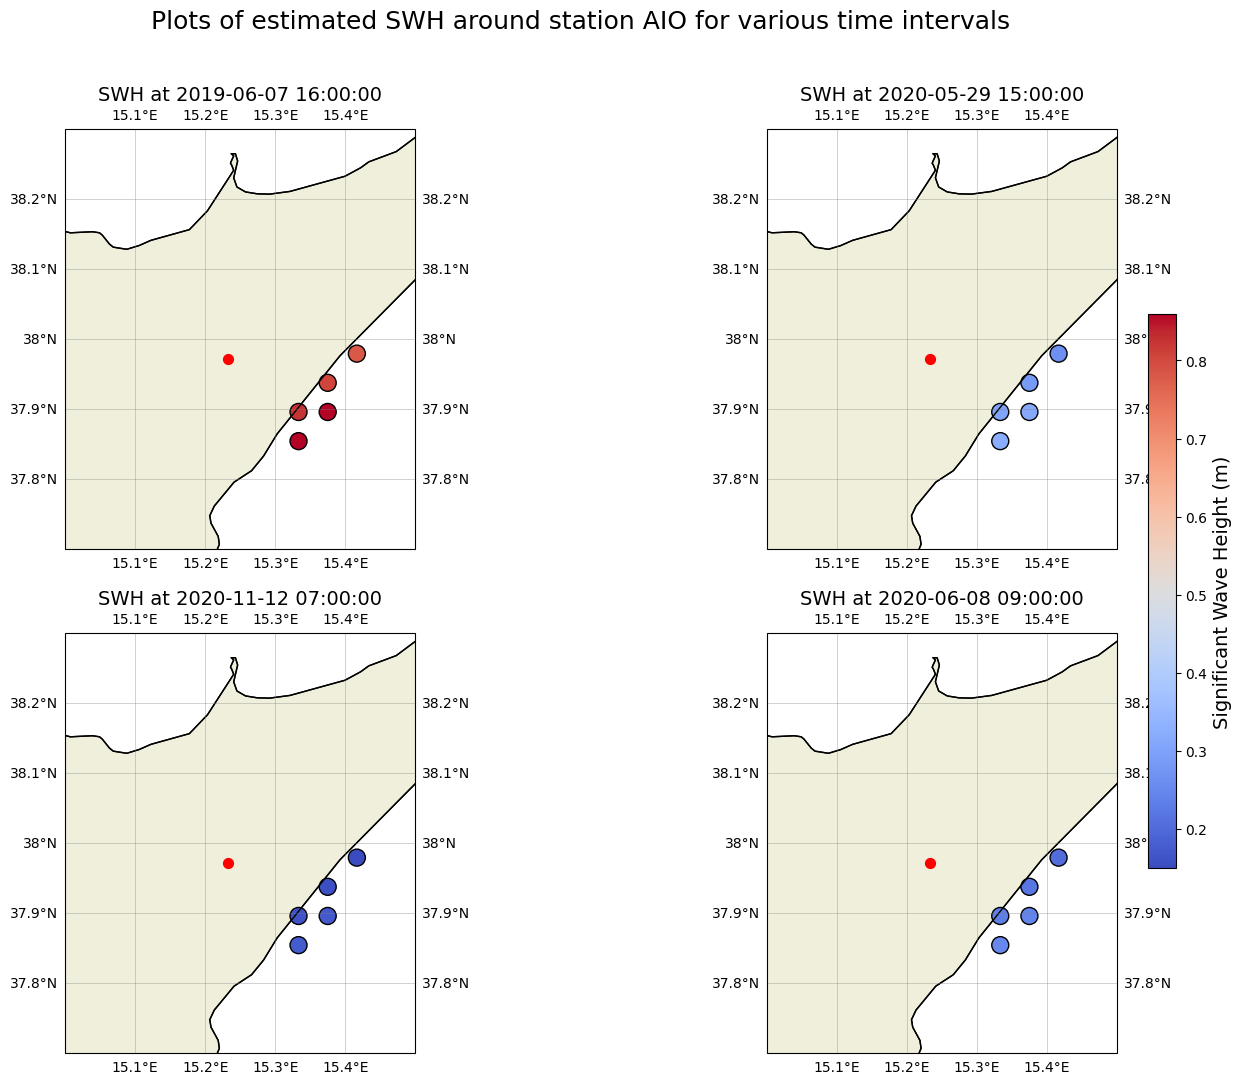

In [30]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-06-07 16:00:00"),
    pd.to_datetime("2020-05-29 15:00:00"),
    pd.to_datetime("2020-11-12 07:00:00"),
    pd.to_datetime("2020-06-08 09:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [15.0, 15.5, 37.7, 38.3]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations
    ax.scatter(15.233, 37.9712, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

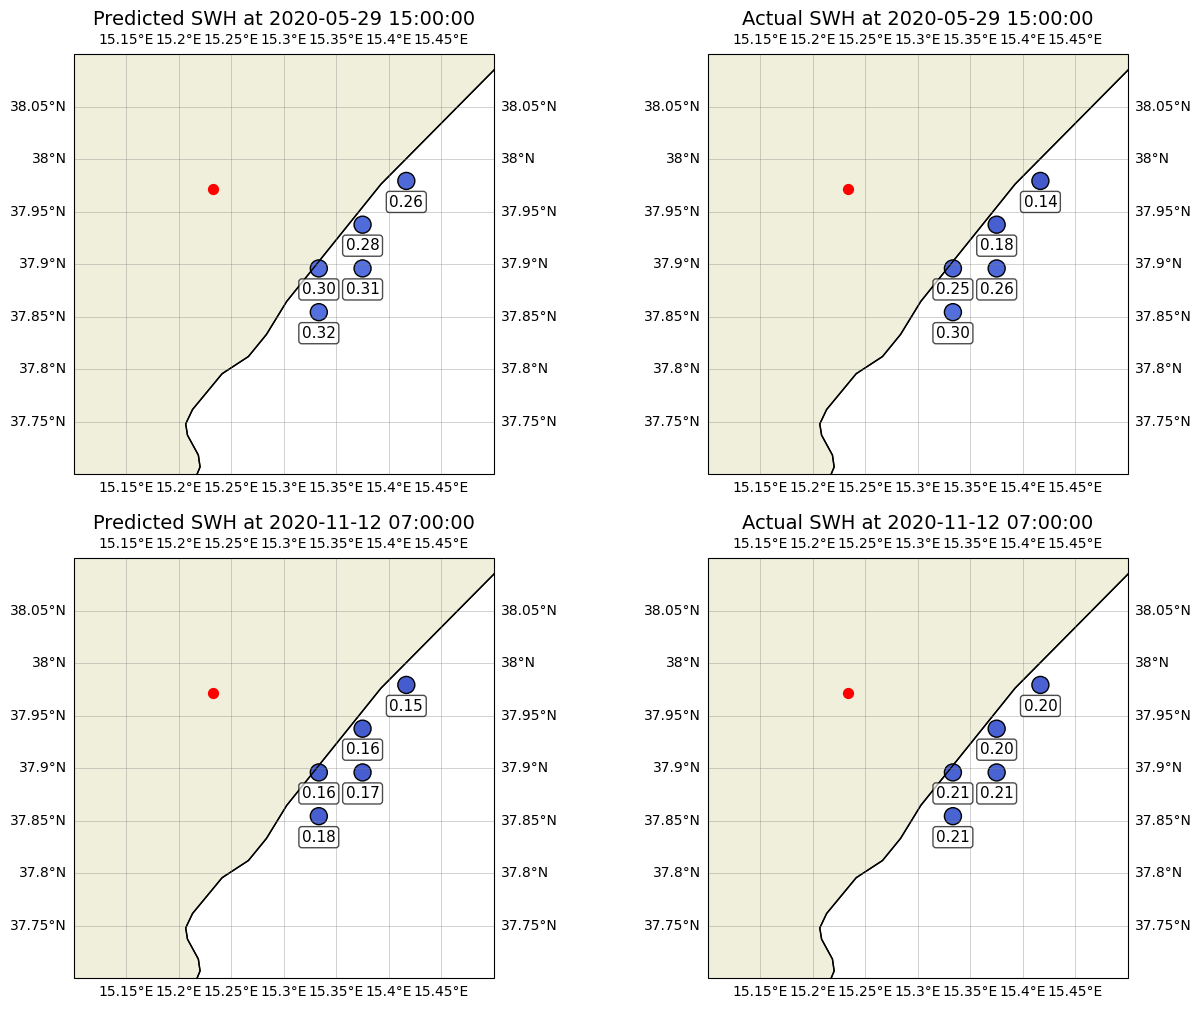

In [38]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2020-05-29 15:00:00"),
    pd.to_datetime("2020-11-12 07:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [15.1, 15.5, 37.7, 38.1]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(15.233, 37.9712, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.02, f"{height:.2f}", fontsize=11, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Actual SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.02, f"{height:.2f}", fontsize=11, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of predicted and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Time Series

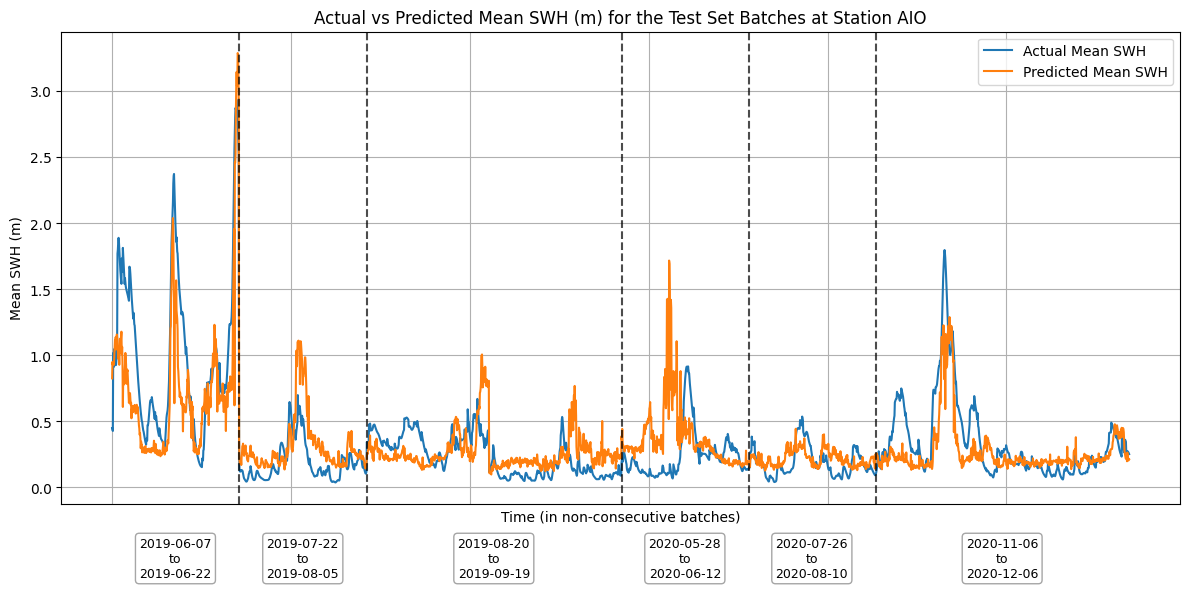

In [36]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()